## Crypto Arbitrage

In this Challenge, I am considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, we might be able to capitalize on simultaneous price dislocations in those markets by using the powers of Pandas.

I sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. I will apply financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data


### Step 1: Using the Pandas `read_csv` function and the `Path` module, I imported the data from `bitstamp.csv` file, and created a DataFrame called `bitstamp`. I Set the DatetimeIndex as the Timestamp column, and made sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

### Step 2: Used the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeated Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Preparing the Data

To prepare and clean my data for analysis, I completed the following steps:

1. For the bitstamp DataFrame, replaced or drop all `NaN`, or missing, values in the DataFrame.

2. Used the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Converted the data type of the Close column to a `float`.

4. Reviewed the data for duplicated values, and drop them if necessary.

5. Repeated Steps 1–4 for the coinbase DataFrame.

In [6]:
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


### Step 1: For the bitstamp DataFrame, replaced or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [8]:
bitstamp=bitstamp.dropna()

In [9]:
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Used the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"]= bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.head()

C:\Users\nargesi\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Converted the data type of the Close column to a `float`.

In [11]:
bitstamp.loc[:,"Close"].dtype

dtype('O')

In [12]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"]= bitstamp.loc[:,"Close"].astype("float")

In [13]:
bitstamp.loc[:,"Close"].dtype

dtype('float64')

### Step 4: Reviewed the data for duplicated values, and drop them if necessary.

In [14]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeated Steps 1–4 for the coinbase DataFrame.

In [15]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [16]:
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [17]:
coinbase=coinbase.dropna()

In [18]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [19]:
coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].str.replace("$","")
coinbase.head()

C:\Users\nargesi\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [20]:
coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].astype("float")
coinbase.loc[:,"Close"].dtype

dtype('float64')

In [21]:
coinbase.duplicated().sum()

0

## Analyzing the Data

Your analysis consists of the following tasks: 

1. Choosing the columns of data on which to focus my analysis.

2. Getting the summary statistics and plotted the data.

3. Focused my analysis on specific dates.

4. Calculated the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.


In [22]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


In [23]:
bitstamp_df=pd.DataFrame(bitstamp)

In [24]:
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


In [25]:
bitstamp_sliced =bitstamp_df.loc[:,["Close"]]


In [26]:
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [27]:
coinbase_sliced = coinbase.loc[:,["Close"]]
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.


In [28]:
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [29]:
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Price'}, xlabel='Timestamp'>

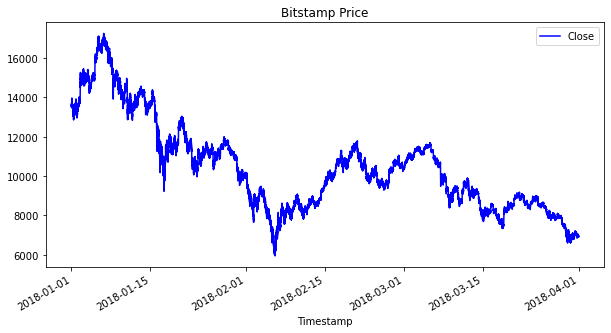

In [30]:
bitstamp_sliced.plot(figsize=(10, 5), title="Bitstamp Price", color="blue")

<AxesSubplot:title={'center':'Coinbase Price'}, xlabel='Timestamp'>

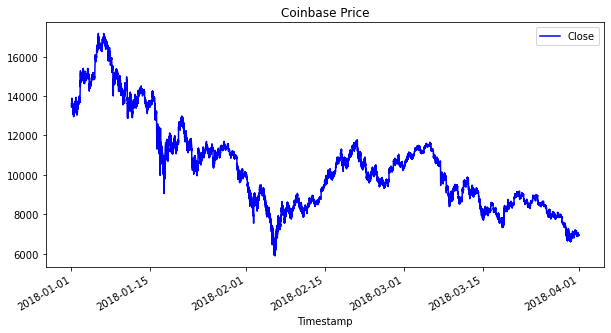

In [31]:
coinbase_sliced.plot(figsize=(10, 5), title="Coinbase Price", color="blue")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

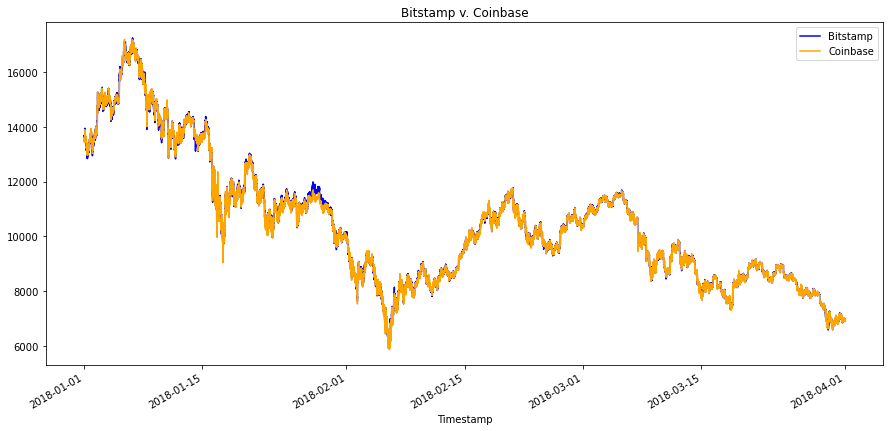

In [32]:
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

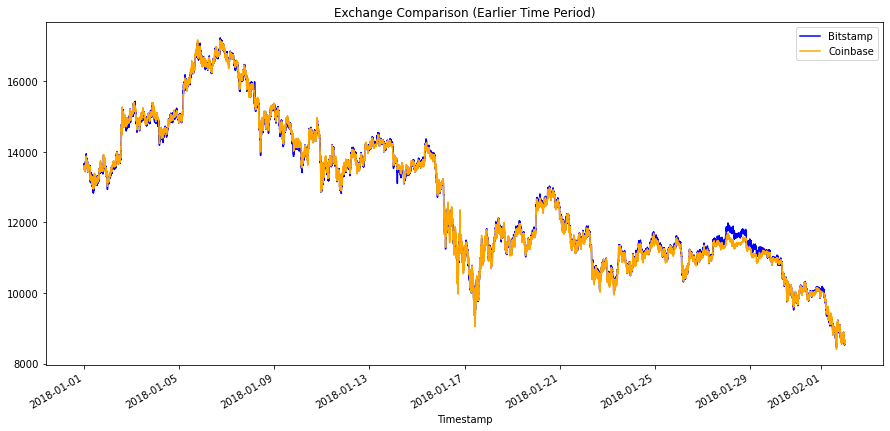

In [33]:
bitstamp_sliced["2018-01-01":"2018-02-01"]['Close'].plot(legend=True, figsize=(15, 7), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase_sliced["2018-01-01":"2018-02-01"]['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

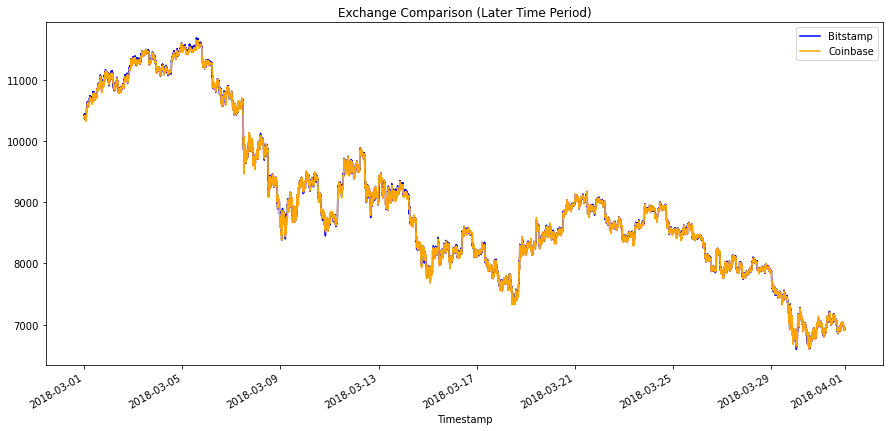

In [34]:
bitstamp_sliced["2018-03-01":"2018-04-01"]['Close'].plot(legend=True, figsize=(15, 7), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")
coinbase_sliced["2018-03-01":"2018-04-01"]['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates


<AxesSubplot:title={'center':'Jan 14, 2018'}, xlabel='Timestamp'>

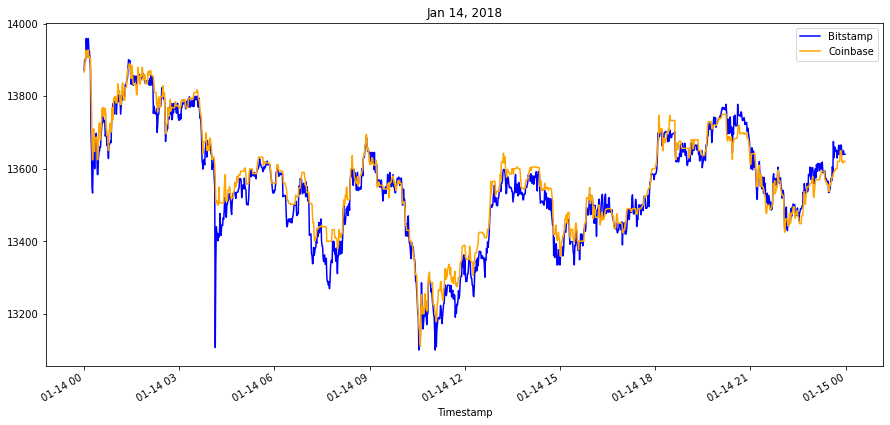

In [35]:
bitstamp_sliced["2018-01-14 00:00:00":"2018-01-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), title="Jan 14, 2018", color="blue", label="Bitstamp")
coinbase_sliced["2018-01-14 00:00:00":"2018-01-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [36]:
arbitrage_spread_early = bitstamp_sliced['Close'].loc["2018-01-14 00:00:00":"2018-01-14 23:59:00"] - coinbase_sliced['Close'] .loc["2018-01-14 00:00:00":"2018-01-14 23:59:00"]

arbitrage_spread_early.describe()

count    1439.000000
mean      -16.685274
std        34.341516
min      -468.000000
25%       -35.975000
50%       -14.980000
75%         4.995000
max        89.260000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread- Early Date'}>

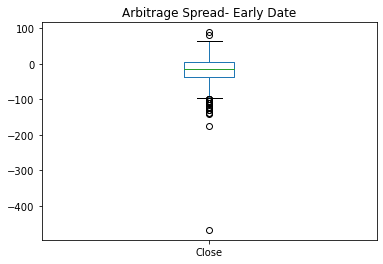

In [37]:
arbitrage_spread_early.plot(kind="box",title="Arbitrage Spread- Early Date")

<AxesSubplot:title={'center':'Feb 14, 2018'}, xlabel='Timestamp'>

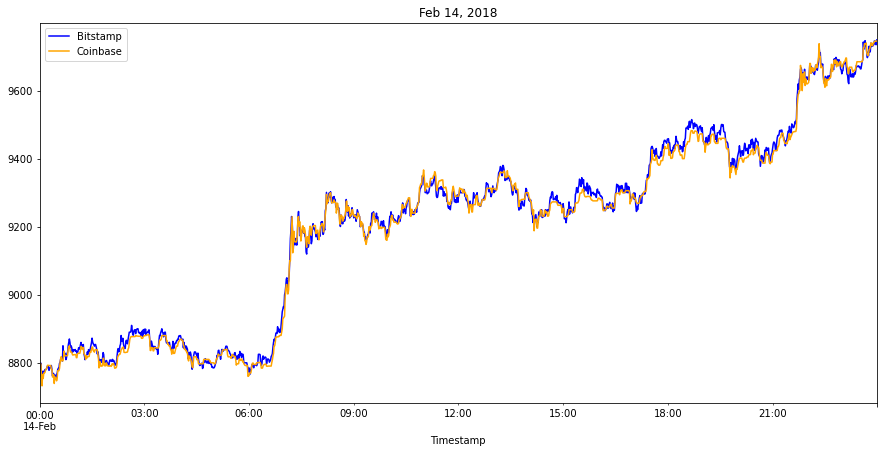

In [38]:
bitstamp_sliced["2018-02-14 00:00:00":"2018-02-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), title="Feb 14, 2018", color="blue", label="Bitstamp")
coinbase_sliced["2018-02-14 00:00:00":"2018-02-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [39]:
arbitrage_spread_middle = bitstamp_sliced['Close'].loc["2018-02-14 00:00:00":"2018-02-14 23:59:00"] - coinbase_sliced['Close'] .loc["2018-02-14 00:00:00":"2018-02-14 23:59:00"]

arbitrage_spread_middle.describe()

count    1440.000000
mean        6.716861
std        15.037548
min       -33.620000
25%        -3.637500
50%         7.080000
75%        17.012500
max        65.190000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread- Middle Date'}>

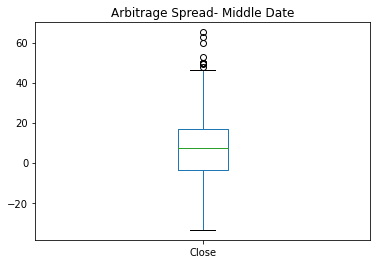

In [40]:
arbitrage_spread_middle.plot(kind="box",title="Arbitrage Spread- Middle Date")

<AxesSubplot:title={'center':'Mar 14, 2018'}, xlabel='Timestamp'>

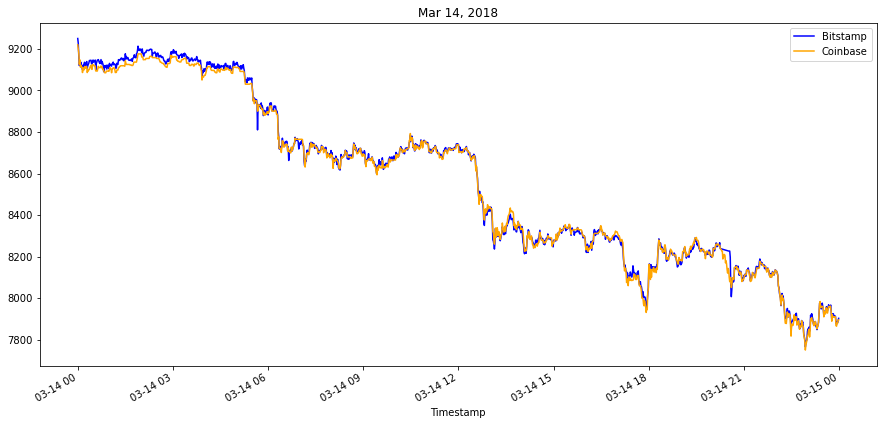

In [41]:
bitstamp_sliced["2018-03-14 00:00:00":"2018-03-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), title="Mar 14, 2018", color="blue", label="Bitstamp")
coinbase_sliced["2018-03-14 00:00:00":"2018-03-14 23:59:00"]['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [42]:
arbitrage_spread_late = bitstamp_sliced['Close'].loc["2018-03-14 00:00:00":"2018-03-14 23:59:00"] - coinbase_sliced['Close'] .loc["2018-03-14 00:00:00":"2018-03-14 23:59:00"]

arbitrage_spread_late.describe()

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread- Late Date'}>

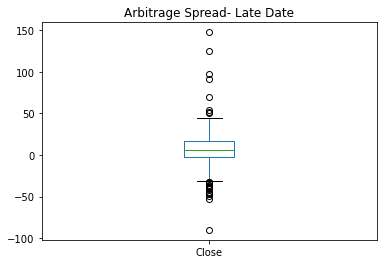

In [43]:
arbitrage_spread_late.plot(kind="box",title="Arbitrage Spread- Late Date")

### Step 4: Calculate the Arbitrage Profits


*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [44]:
arbitrage_spread_early.head()


Timestamp
2018-01-14 00:00:00     5.33
2018-01-14 00:01:00    25.73
2018-01-14 00:02:00    -9.89
2018-01-14 00:03:00    -2.06
2018-01-14 00:04:00    33.32
Name: Close, dtype: float64

In [45]:
early_spread_return= arbitrage_spread_early[arbitrage_spread_early>0]

In [46]:
early_spread_return.head()

Timestamp
2018-01-14 00:00:00     5.33
2018-01-14 00:01:00    25.73
2018-01-14 00:04:00    33.32
2018-01-14 00:05:00    18.90
2018-01-14 00:07:00    31.75
Name: Close, dtype: float64

In [47]:
early_spread_return.describe()

count    436.000000
mean      19.032431
std       14.708707
min        0.060000
25%        7.552500
50%       15.515000
75%       27.862500
max       89.260000
Name: Close, dtype: float64

In [48]:
middle_spread_return=arbitrage_spread_middle
middle_spread_return.head()


Timestamp
2018-02-14 00:00:00    -6.02
2018-02-14 00:01:00    -4.42
2018-02-14 00:02:00     1.83
2018-02-14 00:03:00    -1.18
2018-02-14 00:04:00    27.79
Name: Close, dtype: float64

In [49]:
middle_spread_return= arbitrage_spread_middle[arbitrage_spread_middle>0]
middle_spread_return.head()

Timestamp
2018-02-14 00:02:00     1.83
2018-02-14 00:04:00    27.79
2018-02-14 00:05:00     9.52
2018-02-14 00:06:00    15.28
2018-02-14 00:07:00     5.02
Name: Close, dtype: float64

In [50]:
later_spread_return=arbitrage_spread_late
later_spread_return.head()

Timestamp
2018-03-14 00:00:00    30.00
2018-03-14 00:01:00    28.76
2018-03-14 00:02:00   -15.03
2018-03-14 00:03:00    -5.03
2018-03-14 00:04:00    -3.66
Name: Close, dtype: float64

In [51]:
later_spread_return=arbitrage_spread_late[arbitrage_spread_late>0]
later_spread_return.head()

Timestamp
2018-03-14 00:00:00    30.00
2018-03-14 00:01:00    28.76
2018-03-14 00:05:00    17.84
2018-03-14 00:06:00    14.57
2018-03-14 00:07:00     3.00
Name: Close, dtype: float64

####  For each of the three dates, I calculated the spread returns. To do so, I divided the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange I'm buying on (that is, the lower-priced exchange). 

In [52]:
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/coinbase_sliced['Close'] .loc["2018-01-14 00:00:00":"2018-01-14 23:59:00"]

spread_return_early.head()

Timestamp
2018-01-14 00:00:00    0.000384
2018-01-14 00:01:00    0.001855
2018-01-14 00:02:00         NaN
2018-01-14 00:03:00         NaN
2018-01-14 00:04:00    0.002393
Name: Close, dtype: float64

In [53]:
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0]/coinbase_sliced['Close'] .loc["2018-02-14 00:00:00":"2018-02-14 23:59:00"]
spread_return_middle.head()

Timestamp
2018-02-14 00:00:00         NaN
2018-02-14 00:01:00         NaN
2018-02-14 00:02:00    0.000208
2018-02-14 00:03:00         NaN
2018-02-14 00:04:00    0.003183
Name: Close, dtype: float64

In [54]:
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0]/coinbase_sliced['Close'] .loc["2018-03-14 00:00:00":"2018-03-14 23:59:00"]
spread_return_late.head()

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
Name: Close, dtype: float64

In [55]:
profitable_trades_early = spread_return_early[spread_return_early> .01]

profitable_trades_early.head()

Series([], Name: Close, dtype: float64)

In [56]:
profitable_trades_middle=spread_return_middle[spread_return_middle>.01]
profitable_trades_middle.head()


Series([], Name: Close, dtype: float64)

In [57]:
profitable_trades_late=spread_return_late[spread_return_late>.01]
profitable_trades_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

In [58]:
profitable_trades_late.sum()

0.057082194580561046

In [59]:
profitable_trades_early.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [60]:
profitable_trades_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [61]:
profitable_trades_late.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

In [62]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*coinbase_sliced['Close'] .loc["2018-01-14 00:00:00":"2018-01-14 23:59:00"]



In [63]:
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

profit_per_trade_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [64]:
profit_middle = profitable_trades_middle*coinbase_sliced['Close'] .loc["2018-02-14 00:00:00":"2018-02-14 23:59:00"]

In [65]:
profit_per_trade_middle = profit_middle.dropna()

profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [66]:
profit_late = profitable_trades_late*coinbase_sliced['Close'] .loc["2018-03-14 00:00:00":"2018-03-14 23:59:00"]

In [67]:
profit_per_trade_late = profit_late.dropna()

profit_per_trade_late.describe()

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

In [68]:
# Generated the summary statistics for the early profit per trade DataFrame


<AxesSubplot:title={'center':'Profit Per Trade- Early Date'}, xlabel='Timestamp'>

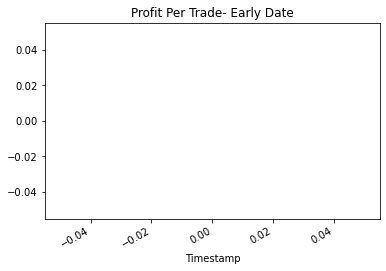

In [69]:
profit_per_trade_early.plot(kind="line",title="Profit Per Trade- Early Date")

<AxesSubplot:title={'center':'Profit Per Trade- Middle Date'}, xlabel='Timestamp'>

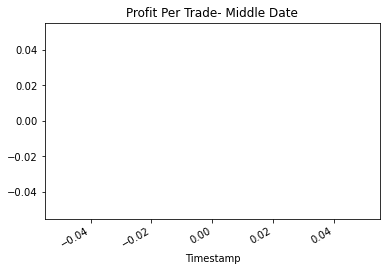

In [70]:
profit_per_trade_middle.plot(kind="line",title="Profit Per Trade- Middle Date")

<AxesSubplot:title={'center':'Profit Per Trade- Later Date'}, xlabel='Timestamp'>

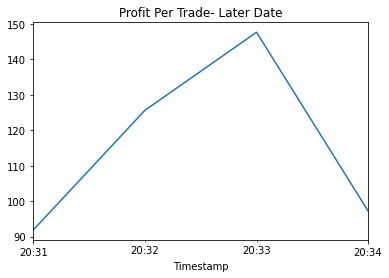

In [71]:
profit_per_trade_late.plot(kind="line",title="Profit Per Trade- Later Date")

In [72]:
profit_per_trade_early.sum()

0.0

In [73]:
profit_per_trade_middle.sum()

0.0

In [74]:
profit_per_trade_late.sum()

462.3899999999976

In [75]:
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum- Early Date'}, xlabel='Timestamp'>

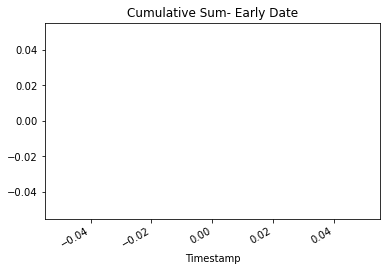

In [76]:
cumulative_profit_early.plot(kind="line", title="Cumulative Sum- Early Date")

<AxesSubplot:title={'center':'Cumulative Sum- Middle Date'}, xlabel='Timestamp'>

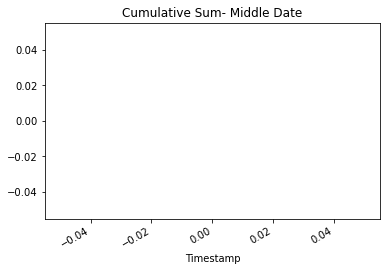

In [77]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(kind="line", title="Cumulative Sum- Middle Date")

<AxesSubplot:title={'center':'Cumulative Sum- Late Date'}, xlabel='Timestamp'>

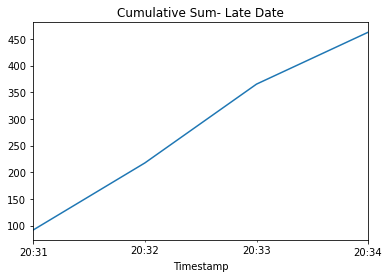

In [78]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot(kind="line", title="Cumulative Sum- Late Date")

**The Question is:** After reviewing the profit information across each date from the different time periods, can we identify any patterns or trends?
    
**Answer:** The last day is the only day that we can see some arbitrage opportunity. 